Analysis and practice of the prototype part

In [1]:
from pypylon import pylon
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import random
import math
import scipy

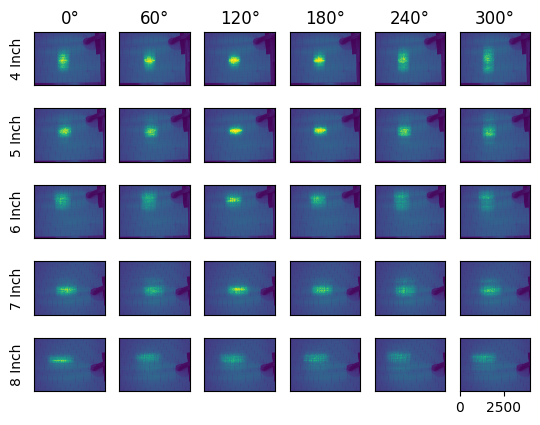

In [2]:
# Display images - heights 4 to 8 inches, rotations at 60 degree intervals

figure, axesN = plt.subplots(5, 6)

for i in range(4, 9):
    data = np.load(str(i) + "inch" + ".npz")

    for j in range (0,301,60):
        img = data["img" + str(i) + "_" + str(j)]
        axesN[i-4][int(j/60)].imshow(img)

        if (not (i == 8 and j == 300)):
            axesN[i-4][int(j/60)].set_xticks([])
        axesN[i-4][int(j/60)].set_yticks([])

    axesN[i-4][0].set_ylabel(str(i) + " Inch")

for i in range(6):
    axesN[0][i].set_title(str(i*60) + "°")

Spread in radians: 0.052684534111574366


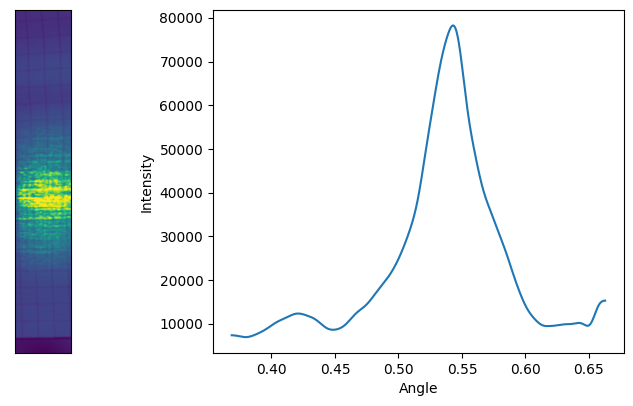

In [3]:
# Repeat for all imgs - smooth 1D array

# 4 - noise [:, 0:500], cropped beam [:, 1410:1910]
# 5 - noise [:, 2500:3000], cropped beam [:, 1400:1900]
# 6 - noise [:, 2500:3000], cropped beam [:, 1200:1700]
# 7 - noise [:, 0:500], cropped beam [:, 1400:1900]
# 8 - noise [:, 0:500], cropped beam [:, 1000:1500]

figure, axes = plt.subplots(1,2, figsize=(8, 4))

data = np.load("4inch.npz")
img = data["img4_60"]

noiseD = img[:, 0:500]
spotD = img[:, 1410:1910]

axes[0].imshow(spotD)
axes[0].set_xticks([])
axes[0].set_yticks([])

finalArr = []
for i in range(len(noiseD)):
    noiseSum = 0
    spotSum = 0
    for j in range(len(noiseD[0])):
        noiseSum+=noiseD[i][j]
        spotSum+=spotD[i][j]
    finalArr.append(spotSum-noiseSum)

x = [(np.arctan(((l/350)+8.5)/22)) for l in range(len(finalArr))]

# get width

smoothArr = scipy.ndimage.gaussian_filter(finalArr, 50)
ymax = smoothArr.max()

# len(smoothArr) is 3036
# 3036/2 is 1518

halfMax = ymax/2

firstArr = smoothArr[:1518]
firstDiff = np.absolute(firstArr - halfMax)
firstIndex = firstDiff.argmin()

secArr = smoothArr[1518:]
secDiff = np.absolute(secArr - halfMax)
secIndex = secDiff.argmin()

print("Spread in radians: " + str(x[secIndex+1518] - x[firstIndex]))

axes[1].plot(x, smoothArr)
axes[1].set_ylabel("Intensity")
axes[1].set_xlabel("Angle")

figure.tight_layout(pad=0.5)

553


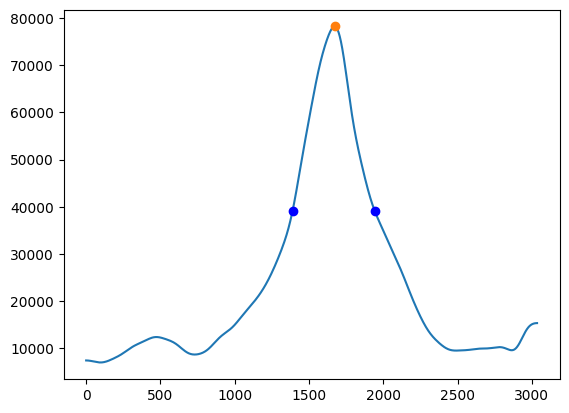

In [4]:
# Repeat for all images - plot max and half-maxes, print FWHM width

figure, axes = plt.subplots(1, 1)

smoothArr = scipy.ndimage.gaussian_filter(finalArr, 50)
axes.plot(smoothArr)

x = [i for i in range(len(smoothArr))]

yMax = smoothArr.max()

whereMax = 0
for i in range(len(smoothArr)):
    if (smoothArr[i] == yMax):
        whereIn = i
        break

halfMax = yMax/2

firstArr = smoothArr[:1518]
firstDiff = np.absolute(firstArr - halfMax)
firstIndex = firstDiff.argmin()

secArr = smoothArr[1518:]
secDiff = np.absolute(secArr - halfMax)
secIndex = secDiff.argmin()

axes.plot(x[whereIn], yMax, 'o')
axes.plot(firstIndex, halfMax, 'o', color="blue")
axes.plot(secIndex+1518, halfMax, 'o', color="blue")

print(secIndex+1518 - firstIndex)

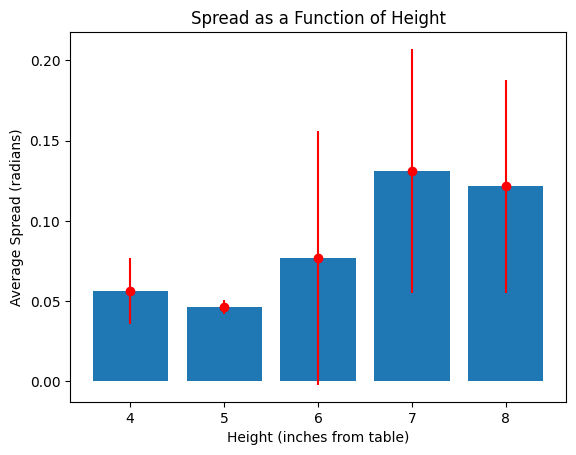

In [12]:
from statistics import mean 

val4 = [ 0.062191077617976265, 0.0409006706249323, 0.03690288184596302, 0.03537627347093997, 0.07121639569648885, 0.09121788642923634]
val5 = [0.04490946122460954,  0.048203250314032275, 0.03942666794424121, 0.04216404380043548, 0.05071384184541777, 0.052244333261118936]
val6 = [0.02795653795914632, 0.024563108129956435, 0.21028473455235291, 0.16381872749320836, 0.018011960697224216, 0.017023521537730013]
val7 = [0.10416234392084178, 0.11032880497381475, 0.2194598112923376, 0.22989678187535723, 0.005345151073460563, 0.11642014921262073]
val8 = [0.10653834585811173, 0.11554795770531412, 0.22530473132546053, 0.16410337516686457, 0.11217450713453425, 0.005345151073460563]

x = [1, 2, 3, 4, 5]
y = [mean(val4), mean(val5), mean(val6), mean(val7), mean(val8)]
plt.bar(x, y)

plt.errorbar(x, y, yerr=[np.std(val4), np.std(val5), np.std(val6), np.std(val7), np.std(val8)], fmt="o", color="r")
plt.xticks([1, 2, 3, 4, 5], [4, 5, 6, 7, 8])
plt.xlabel("Height (inches from table)")
plt.ylabel("Average Spread (radians)")
plt.title("Spread as a Function of Height")

plt.show()

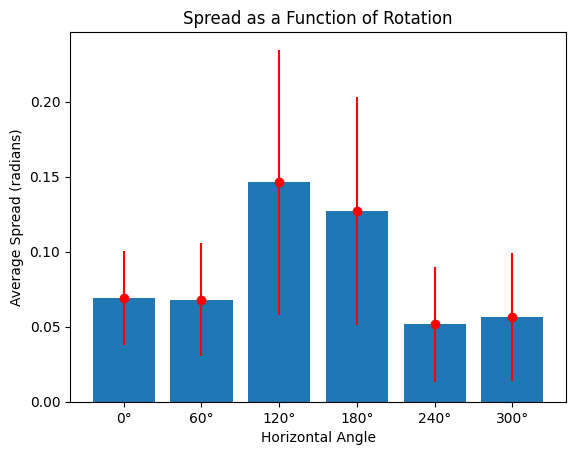

In [13]:
from statistics import mean 

val0 = [0.062191077617976265, 0.04490946122460954, 0.02795653795914632, 0.10416234392084178, 0.10653834585811173]
val60 = [0.0409006706249323, 0.048203250314032275, 0.024563108129956435, 0.11032880497381475, 0.11554795770531412]
val120 = [0.03690288184596302,  0.03942666794424121, 0.21028473455235291, 0.2194598112923376, 0.22530473132546053]
val180 = [0.03537627347093997, 0.04216404380043548, 0.16381872749320836, 0.22989678187535723, 0.16410337516686457]
val240 = [0.07121639569648885, 0.05071384184541777, 0.018011960697224216, 0.005345151073460563, 0.11217450713453425]
val300 = [0.09121788642923634, 0.052244333261118936, 0.017023521537730013, 0.11642014921262073, 0.005345151073460563]

x = [1, 2, 3, 4, 5, 6]
y = [mean(val0), mean(val60), mean(val120), mean(val180), mean(val240), mean(val300)]
plt.bar(x, y)

plt.errorbar(x, y, yerr=[np.std(val0), np.std(val60), np.std(val120), np.std(val180), np.std(val240), np.std(val300)], fmt="o", color="r")
plt.xticks([1, 2, 3, 4, 5, 6], ["0°", "60°", "120°", "180°", "240°", "300°"])
plt.xlabel("Horizontal Angle")
plt.ylabel("Average Spread (radians)")
plt.title("Spread as a Function of Rotation")

plt.show()